# 1) PROBLEM STATEMENT:
     aim of this project is to identify how external data affects the score of the Students external thing like gender,ethnicity,
     parent level of education,lunch etc 

# 2) DATA COLLECTION
      Data is collected from the kaggle link::https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

      data consist of the 8 columns and 1000 rows 

# 3) importing the necessary libraries

In [39]:
import pandas  as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns


# reading the data from the local source 

In [4]:
df=pd.read_csv("./data/StudentsPerformance.csv")

# Shpe of the data

In [5]:
df.shape

(1000, 8)

# Show top 5 datas

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# datacheck to perform
  1) Missing values 
  2) duplicate values
  3) mathematical decribe
  4) distribution of the data 
  5) outlier ditection and treating the outlier 
  6) Feature engineering 
  7) ready for the model training

# Checking the missing values

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

there is no missing value 

# Checking for the duplicate values 

In [15]:
df.duplicated().sum()

0

 there is no duplicate values in the dataset 

# describing the data

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# observation:
  1)average marks of the student is lesser as compare to otherscore 
  
  2)also minimum score in the marks is zero

  3)25% of the students score less than 57 , 59 and 57 respectively in mathematics ,reading and the writing 


  4)50% of the students score lesser than the 66,70,69 respectively in mathematics,rading and writing 
  
  5)maximum sore is 100

on the basis of these data students sore less marks on the mathematics in comparision to the other subjects

# checking the datatype of the data

In [20]:
df.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# checking the unique values in the  dataset


In [24]:
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# exploring the data


In [25]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [36]:
for i in df.columns:
    if df[i].dtype=='object':
        print("NUmber of the categories on " + i + 'data is ' ,end="")
        print(df[i].unique())
        print()
        
    

NUmber of the categories on genderdata is ['female' 'male']

NUmber of the categories on race/ethnicitydata is ['group B' 'group C' 'group A' 'group D' 'group E']

NUmber of the categories on parental level of educationdata is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

NUmber of the categories on lunchdata is ['standard' 'free/reduced']

NUmber of the categories on test preparation coursedata is ['none' 'completed']



# statistical measures of the data

In [38]:
df['math score'].mean()


66.089

<Axes: xlabel='math score', ylabel='Density'>

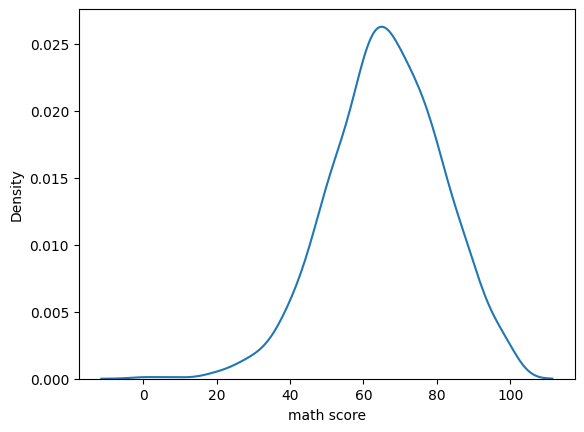

In [41]:
sns.kdeplot(df['math score'])

# skewness of the data

In [42]:
df['math score'].skew()

-0.27893514909431694

 skewness of the data is negatively skewed that means more number of the data is present in left side than the right side and maximum number of the data is present in the middle skewness of the data is less so we can treat these data as a normally distributed data 

In [43]:
df['math score'].mean()

66.089

In [44]:
df['math score'].std()

15.16308009600945

# exploring more gender column

# analyzing who score the more marks gender wise

In [66]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

<Axes: xlabel='gender'>

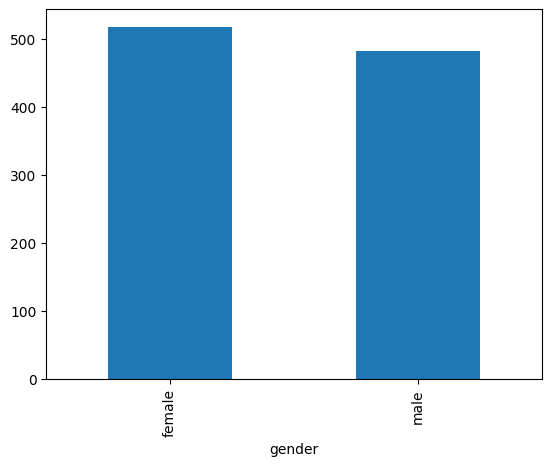

In [68]:
df['gender'].value_counts().plot(kind='bar')

female count (36) is more than the male count   

<Axes: ylabel='count'>

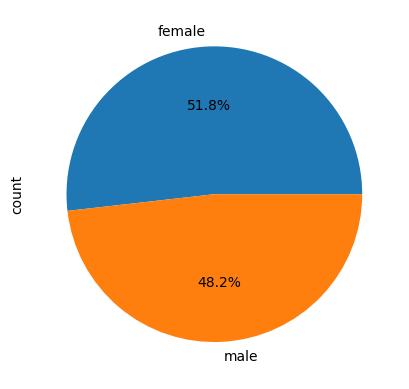

In [71]:
df['gender'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# exploring the ethnicity column

In [75]:
df['race/ethnicity'].value_counts().reset_index()


,race/ethnicity,count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


<Axes: xlabel='race/ethnicity'>

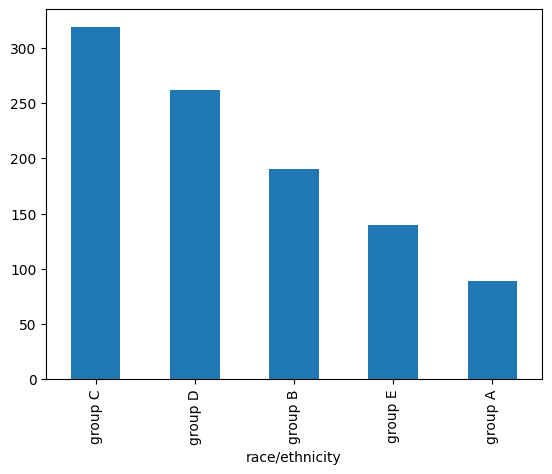

In [77]:
df['race/ethnicity'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

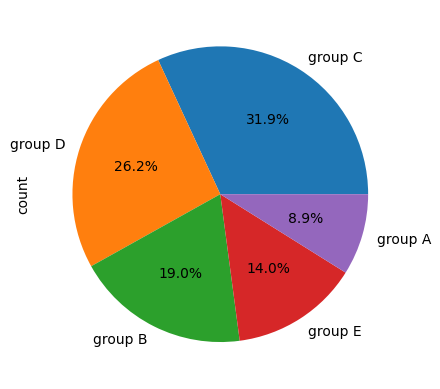

In [78]:
df['race/ethnicity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

population of the group c ethenicity is more and group d group b group b grou e group a comes respectively
group  c and group d population is larger as compre to the other data

about 31.9% of the class contain the group c ethenicity of the total studnets

In [80]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

<Axes: xlabel='parental level of education'>

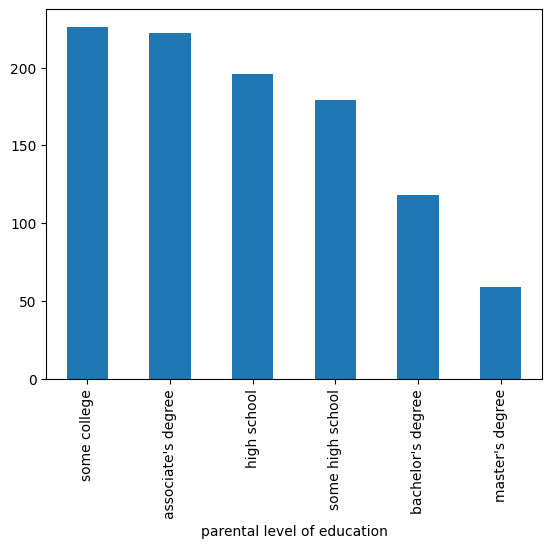

In [81]:
df['parental level of education'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

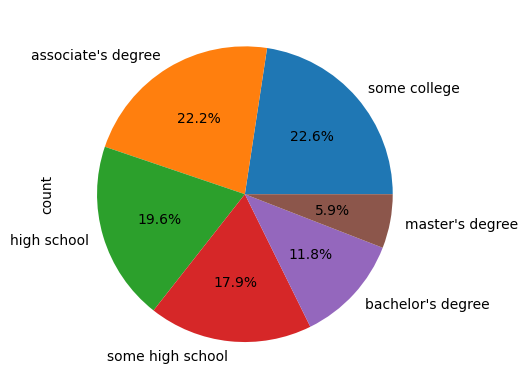

In [82]:
df['parental level of education'].value_counts().plot(kind='pie',autopct="%0.1f%%")

maximum of the students parents are educated so this data may taken from the city area colleges

# exploring the lunch data

In [84]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

<Axes: xlabel='lunch'>

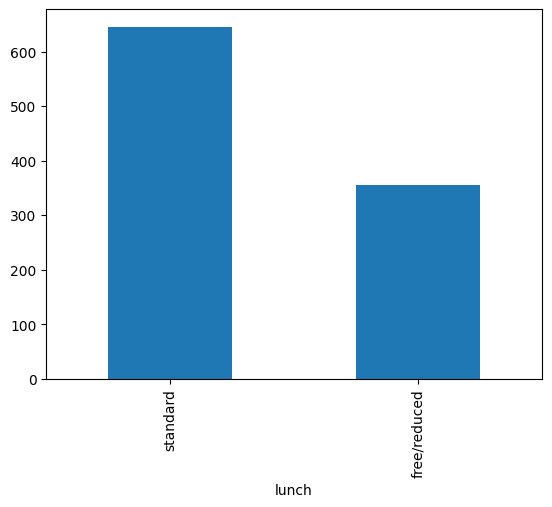

In [90]:
df['lunch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

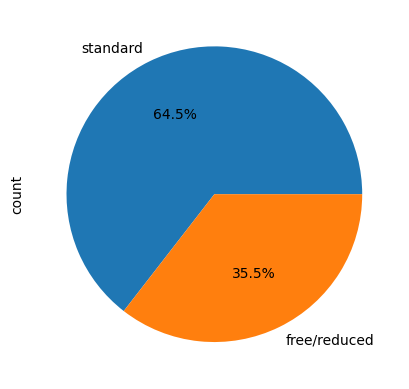

In [91]:
df['lunch'].value_counts().plot(kind='pie',autopct="%0.1f%%")

around 64.5% of the poupulation take the standard lunch , maximum number of the Students may belongs to the rich family

# exploring test preparation course	

In [95]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

<Axes: xlabel='test preparation course'>

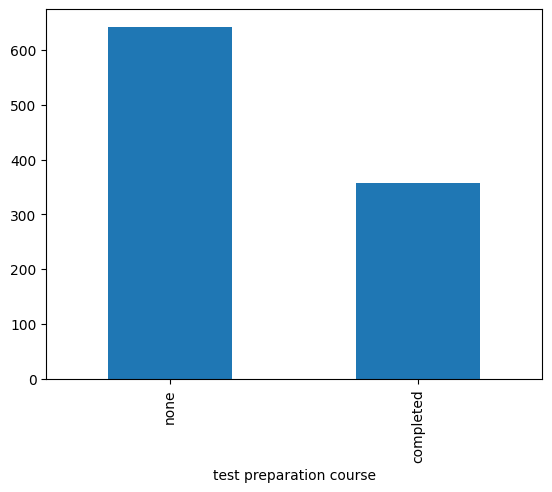

In [96]:
df['test preparation course'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

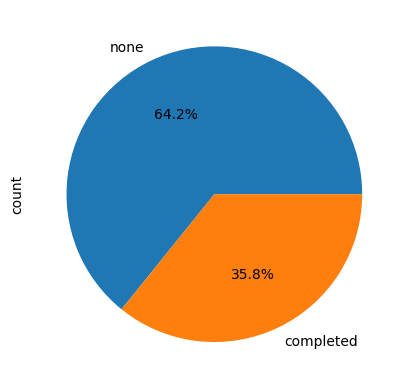

In [97]:
df['test preparation course'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# around 64% of the students not completed the test prepration course 

In [101]:

df['reading score'].mean()

69.169

In [102]:
df['reading score'].std()

14.600191937252216

#  distribtuion of the reading score 

<Axes: xlabel='reading score', ylabel='Density'>

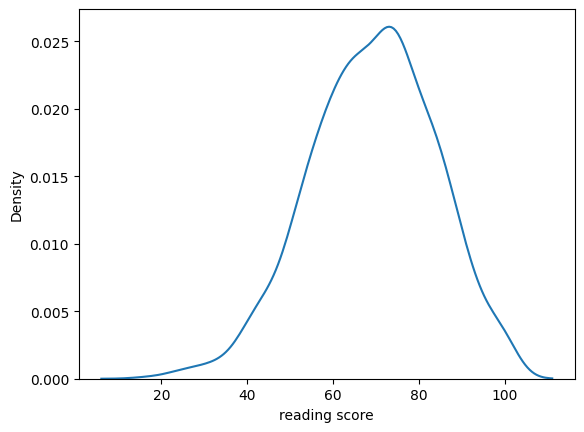

In [103]:
sns.kdeplot(df['reading score'])

In [104]:
df['reading score'].skew()

-0.25910451810923063

# from the above distribtion we can say that the distributin is close to the normal distribution but it is negatively skewed with the small value so we can treat it as a normally distributed data

by looking into the distribution we can say that majority of the people score value near to the mean and very few of the population get high score also some of the studnets got the full score 


# exploring the writing score of the writing score of the students 

In [107]:
df['writing score'].mean()

68.054

In [108]:
df['writing score'].std()

15.19565701086965

<Axes: xlabel='writing score', ylabel='Density'>

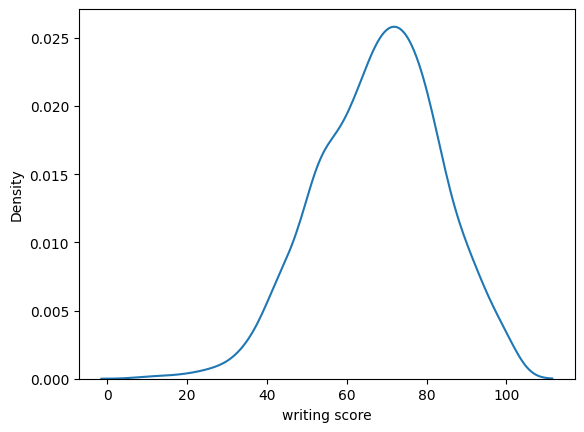

In [109]:
sns.kdeplot(df['writing score'])

In [110]:
df['writing score'].skew()

-0.28944397150761897

also the wirting score data follow the same distribytionas the other data  but we can treat it as a normally distributed data because of the it small negative skewed value


# multi variate analysis

In [57]:
math_marks_gender=df['math score'].groupby(df['gender']).sum().reset_index()

In [61]:
math_marks_gender

,gender,math score
0,female,32962
1,male,33127


<BarContainer object of 2 artists>

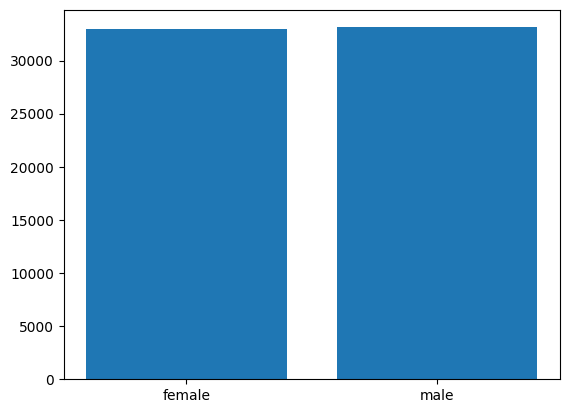

In [60]:
plt.bar(math_marks_gender['gender'],math_marks_gender['math score'])

as comapre to the female in the mathematics male score the more marks 